当前路径: D:\HO\my_smiles_project\QSAR_Project\notebooks
⬆️ 从 notebooks 退回 QSAR_Project
最终路径: D:\HO\my_smiles_project\QSAR_Project
🚀 启动 QSAR 全自动流水线 (Universal Mode)...
🤖 当前目标模型: 【 svm 】

>>> [1/4] 准备数据 (Feature Engineering)...
>>> [Step 1] Reading Data & Generating Features...
📊 Raw Features Shape: (151, 240)
   -> [Raw_Generated] Remaining: 240 (Dropped: 0)

>>> [Step 2] Dynamic Splitting (Train/Val/Test)...
⚠️ 未收到指令，使用默认种子 Seed = 888

>>> [Step 3] Processing Pipeline (Fit on Train)...
   Processing Imputation (Median)...
   Processing Quasi-Constant Filter (threshold=0.99)...
   -> [Variance_Filter] Remaining: 189 (Dropped: 51)
   Processing Correlation Filter (threshold=0.90)...
   -> [Correlation_Filter] Remaining: 128 (Dropped: 61)
   Processing ElasticNet Selection...
   -> [ElasticNet_Selection] Remaining: 41 (Dropped: 87)

>>> [Step 4] Saving Results & Logs...
✅ Success! ElasticNet kept 41 robust features.
   Alpha: 0.264709, L1_Ratio: 0.1
   Logs saved to results/logs/

>>> [2/4] 

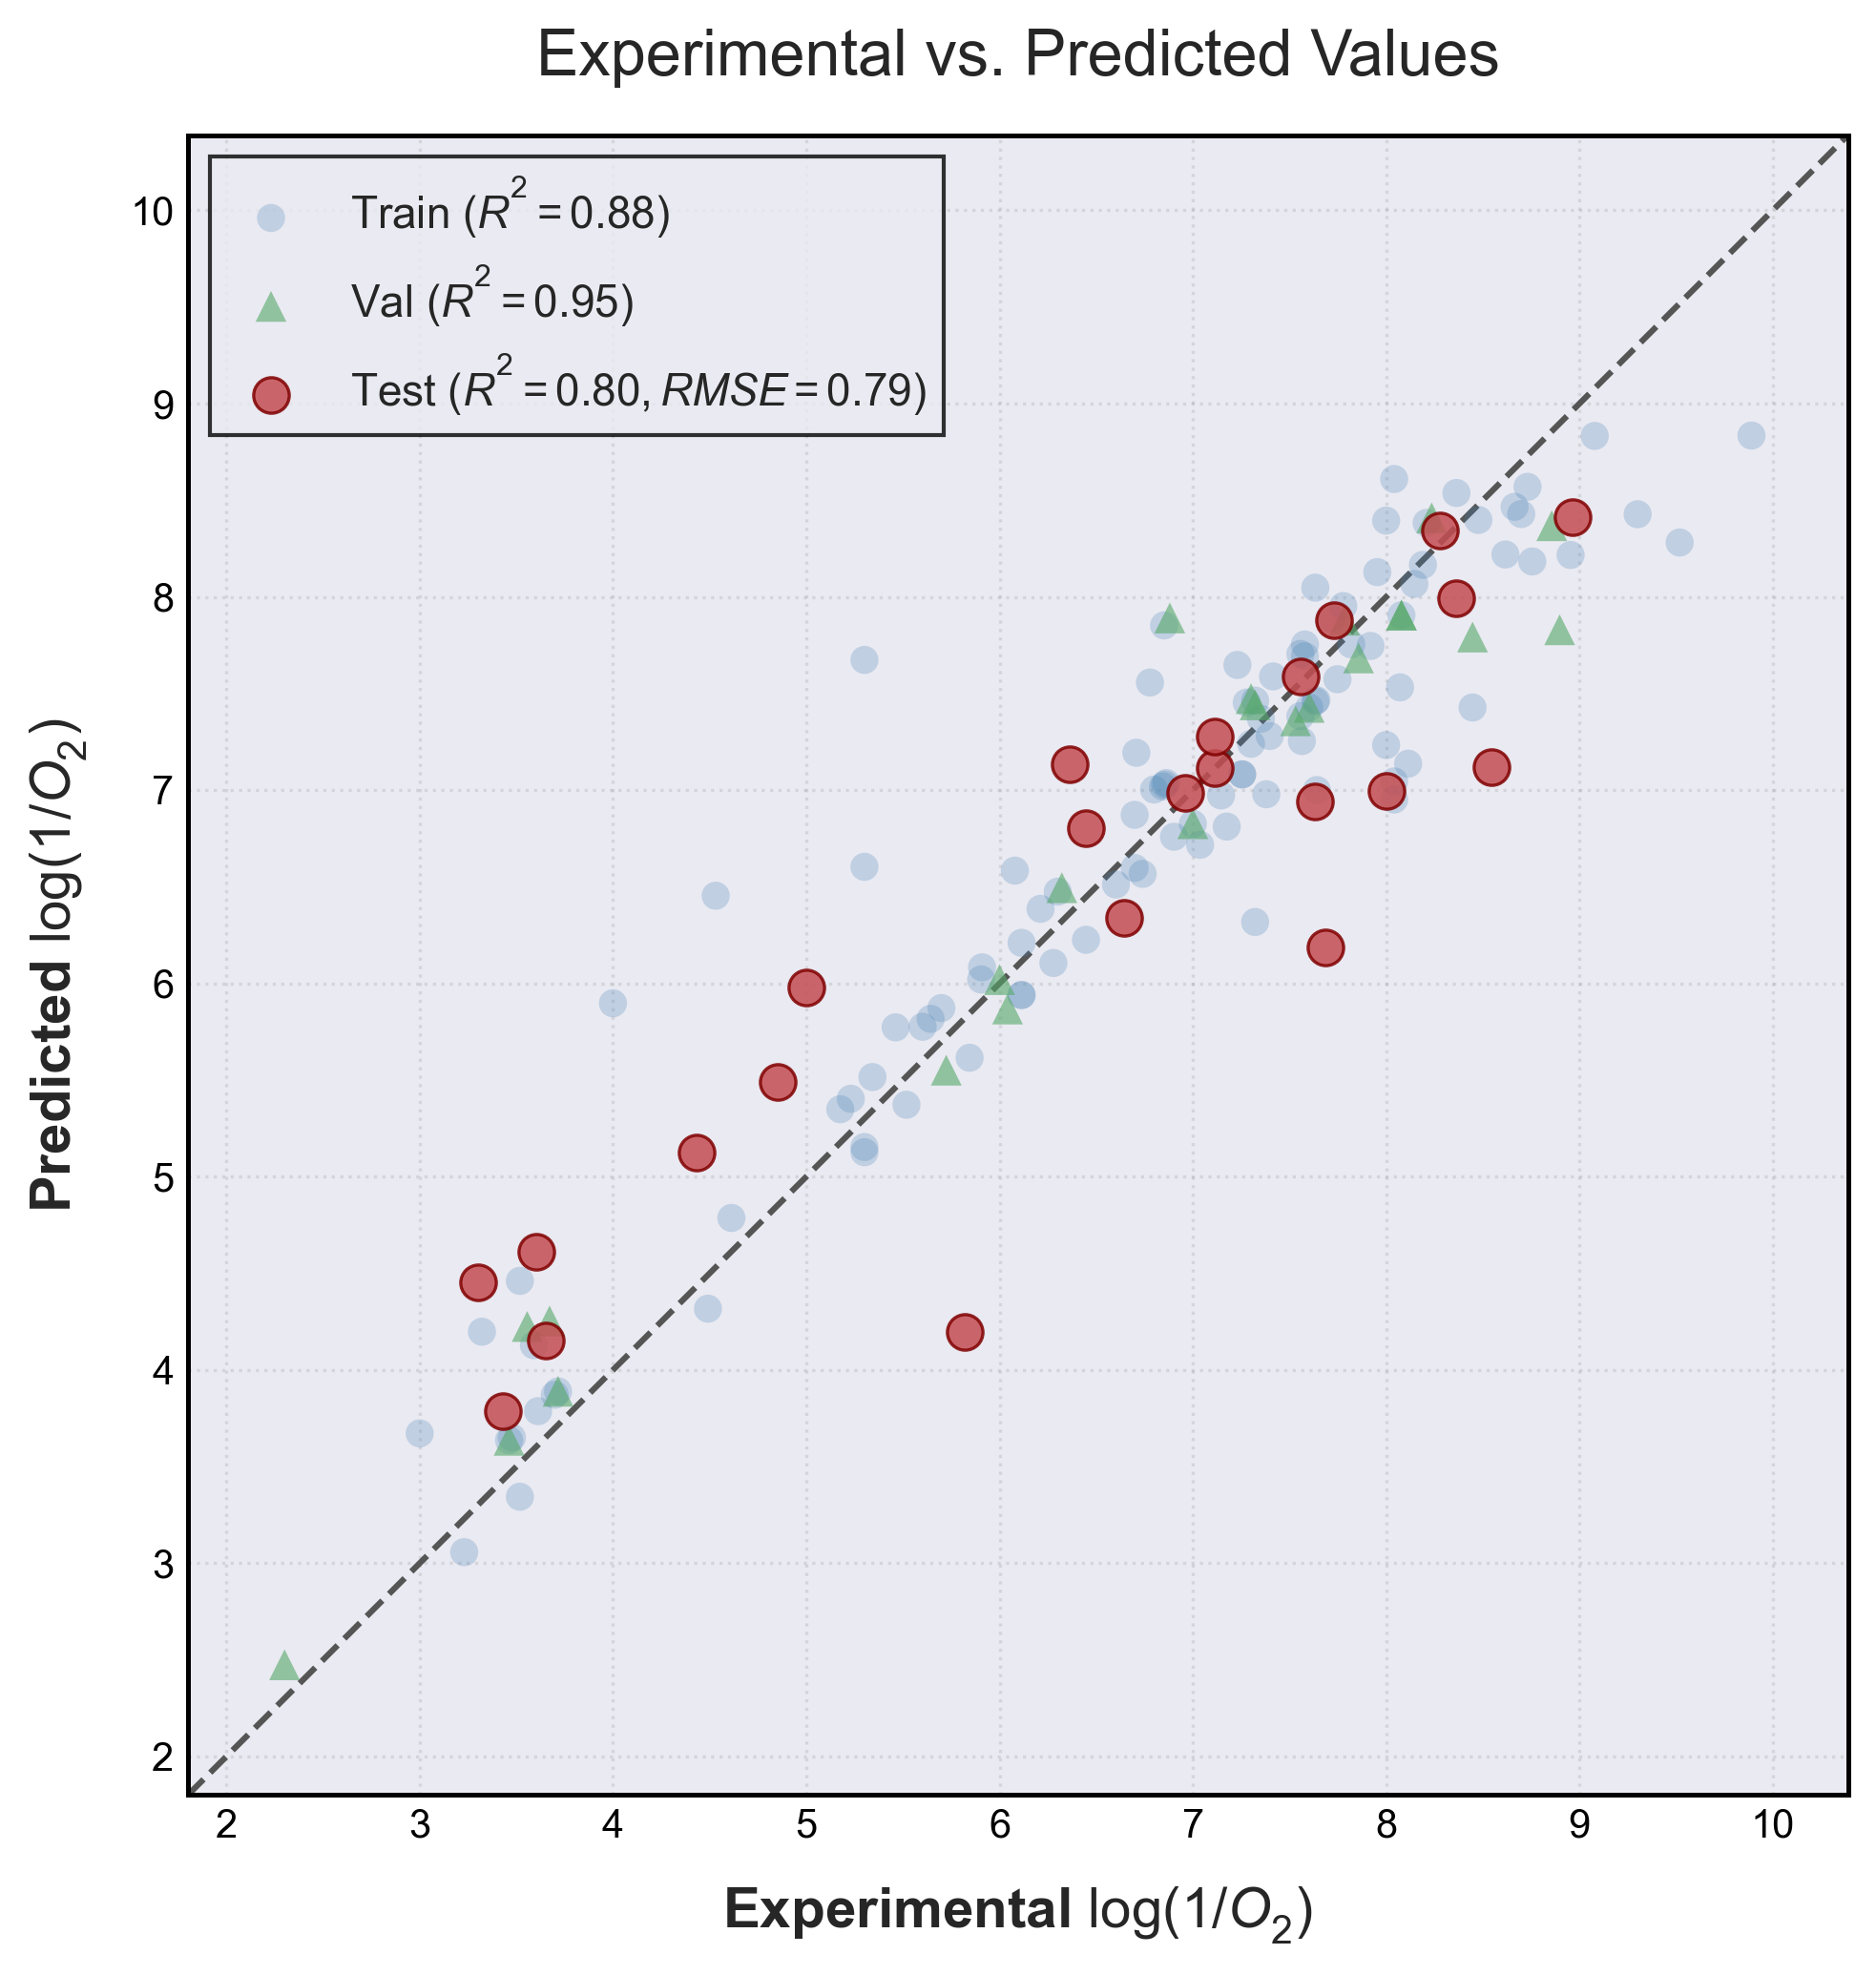


🎉🎉🎉 SVM 任务全部完成！


In [5]:
# ==========================================
# File: 00_Master_Pipeline.ipynb (万能通用版)
# ==========================================
import os

cwd = os.getcwd()
print("当前路径:", cwd)

# 如果在 notebooks 里，先退一层
if cwd.endswith("notebooks"):
    os.chdir("..")
    print("⬆️ 从 notebooks 退回 QSAR_Project")

print("最终路径:", os.getcwd())

print("🚀 启动 QSAR 全自动流水线 (Universal Mode)...")

# 👇👇👇 【控制台】 👇👇👇
TARGET_MODEL = "svm"
# 👆👆👆👆👆👆👆👆👆👆👆👆👆👆👆👆

# 1. 自动标准化名字
model_tag = TARGET_MODEL.lower()
print(f"🤖 当前目标模型: 【 {model_tag} 】")

# ========================================================
# 阶段 1: 特征工程 (所有模型公用)
# ========================================================
print("\n>>> [1/4] 准备数据 (Feature Engineering)...")
# 这是一个固定的基础文件，通常不用变
%run notebooks/01_feature_engineering.ipynb


# ========================================================
# 阶段 2: 动态寻找调参文件
# ========================================================
# 魔法在这里：自动拼凑出文件名，比如 "notebooks/02_model_tuning_svm.ipynb"
tuning_file = f"notebooks/02_model_tuning_{model_tag}.ipynb"

print(f"\n>>> [2/4] 正在寻找调参文件: {tuning_file} ...")

if os.path.exists(tuning_file):
    # 这里的 $tuning_file 意思是让 jupyter 读取 python 变量作为文件名
    %run "$tuning_file"
else:
    print(f"❌ 严重错误：找不到文件 {tuning_file} ！")
    print(f"请检查你是否新建了名为 02_model_tuning_{model_tag}.ipynb 的文件？")
    # 找不到文件就直接报错停止，不再往下跑
    raise FileNotFoundError(f"缺少 {model_tag} 的调参文件")


# ========================================================
# 阶段 3: 动态寻找训练文件
# ========================================================
training_file = f"notebooks/03_final_training_{model_tag}.ipynb"

print(f"\n>>> [3/4] 正在寻找训练文件: {training_file} ...")

if os.path.exists(training_file):
    %run "$training_file"
else:
    print(f"❌ 严重错误：找不到文件 {training_file} ！")
    raise FileNotFoundError(f"缺少 {model_tag} 的训练文件")


# ========================================================
# 阶段 4: 可视化 (所有模型公用)
# ========================================================
print("\n>>> [4/4] 正在画图...")
# 只要前面的步骤生成了 csv 结果，这个文件就能画出来
%run notebooks/04_visualization.ipynb

print(f"\n🎉🎉🎉 {model_tag.upper()} 任务全部完成！")
